***A**** ***Search***

* So far we have studied uninformed search strategies. There can also be occasions where we are given some extra information related to a particular goal in the form of heuristics. We can use such heuristics in our search strategy. A particular form of this strategy known as A* search uses the total cost of a solution via a particular node as that node’s evaluation criteria.

* **A\*** is a graph traversal and pathfinding algorithm widely used in AI for finding the shortest path between nodes.
* It combines the benefits of **Dijkstra’s Algorithm** and **Greedy Best-First Search** using the formula: **f(n) = g(n) + h(n)**, where:

  * *g(n)* is the cost from the start node to the current node,
  * *h(n)* is the heuristic estimate of the cost from the current node to the goal.
* It uses a **priority queue (open list)** to explore nodes with the lowest estimated total cost first.
* The choice of heuristic function *h(n)* significantly affects the performance and accuracy of the algorithm.
* A\* is **complete and optimal** when the heuristic used is **admissible** (never overestimates the cost to reach the goal).


In [1]:
import math
# Node class representing a state or city in the graph
class Node:
    def __init__(self, state, parent, actions, totalCost, heuristic):
        self.state = state  # State or City name
        self.parent = parent  # Parent state or city in the path
        self.actions = actions  # List of neighboring cities with cost
        self.totalCost = totalCost  # Cost to reach this node
        self.heuristic = heuristic  # Straight-line distance to Goal

In [2]:
# Function to find the node with minimum f(n) = g(n) + h(n) in frontier
def findMin(frontier):
    min_f = float('inf')  # Initialize with infinity (so any actual cost will be smaller)
    min_node = None       # Stores the node with the minimum cost
    
    for (f_cost, state) in frontier:  # Loop through all nodes in frontier
        if f_cost < min_f:            # If current node's cost is lower than the minimum found so far
            min_f = f_cost            # Update the minimum cost
            min_node = (f_cost, state)  # Update the best node
    
    return min_node  # Return the node with the smallest f(n)


#Input: frontier (a list of tuples (f_cost, state))
#Output: The tuple (f_cost, state) with the smallest f_cost.

In [3]:
# Function to reconstruct the path from goal back to start
def actionsequence(graph, initialstate, goalstate):
    solution = [goalstate]  # Start with the goal city
    currentparent = graph[goalstate].parent  # Get goal's parent
    
    # Work backwards through parents to build the path
    while currentparent is not None:
        solution.append(currentparent.state)
        currentparent = graph[currentparent.state].parent
    
    solution.reverse()  # Reverse to get start-to-goal order
    return solution

* **Euclidean Distance:** straight-line distance between two points
* ***d = √[(x2 - x1)² + (y2 - y1)²]*** 
* When to use this heuristic? – When we are allowed to move in any directions.

__

* **Manhattan Distance:** distance along grid lines (like city blocks)
* ***d = |x2 - x1| + |y2 - y1|***
* When to use this heuristic? – When we are allowed to move only in four directions only (right, left, top, bottom)

In [4]:
# Heuristic function - straight-line distances to Bucharest
def heuristic(city):
    # Predefined straight-line distances in km
    heuristics = {
        'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Drobeta': 242, 'Eforie': 161,
        'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151, 'Iasi': 226, 'Lugoj': 244,
        'Mehadia': 241, 'Neamt': 234, 'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193,
        'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
    }
    return heuristics.get(city, float('inf'))  # Return infinity if city not found

#dict.get(key, default_value) retrieves a value for a given key from a dictionary


In [5]:
# A* Search Algorithm
def Astar():
    initialState = 'Arad'
    goalState = 'Bucharest'

    # Romania map with cities and road distances
    graph = {
        'Arad': Node('Arad', None, [('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)], float('inf'), heuristic('Arad')),
        'Zerind': Node('Zerind', None, [('Arad', 75), ('Oradea', 71)], float('inf'), heuristic('Zerind')),
        'Oradea': Node('Oradea', None, [('Zerind', 71), ('Sibiu', 151)], float('inf'), heuristic('Oradea')),
        'Sibiu': Node('Sibiu', None, [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)], float('inf'), heuristic('Sibiu')),
        'Fagaras': Node('Fagaras', None, [('Sibiu', 99), ('Bucharest', 211)], float('inf'), heuristic('Fagaras')),
        'Rimnicu Vilcea': Node('Rimnicu Vilcea', None, [('Sibiu', 80), ('Pitesti', 97), ('Craiova', 146)], float('inf'), heuristic('Rimnicu Vilcea')),
        'Pitesti': Node('Pitesti', None, [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)], float('inf'), heuristic('Pitesti')),
        'Craiova': Node('Craiova', None, [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)], float('inf'), heuristic('Craiova')),
        'Drobeta': Node('Drobeta', None, [('Mehadia', 75), ('Craiova', 120)], float('inf'), heuristic('Drobeta')),
        'Mehadia': Node('Mehadia', None, [('Lugoj', 70), ('Drobeta', 75)], float('inf'), heuristic('Mehadia')),
        'Lugoj': Node('Lugoj', None, [('Timisoara', 111), ('Mehadia', 70)], float('inf'), heuristic('Lugoj')),
        'Timisoara': Node('Timisoara', None, [('Arad', 118), ('Lugoj', 111)], float('inf'), heuristic('Timisoara')),
        'Bucharest': Node('Bucharest', None, [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)], float('inf'), heuristic('Bucharest')),
        'Giurgiu': Node('Giurgiu', None, [('Bucharest', 90)], float('inf'), heuristic('Giurgiu')),
        'Urziceni': Node('Urziceni', None, [('Bucharest', 85), ('Vaslui', 142), ('Hirsova', 98)], float('inf'), heuristic('Urziceni')),
        'Hirsova': Node('Hirsova', None, [('Urziceni', 98), ('Eforie', 86)], float('inf'), heuristic('Hirsova')),
        'Eforie': Node('Eforie', None, [('Hirsova', 86)], float('inf'), heuristic('Eforie')),
        'Vaslui': Node('Vaslui', None, [('Urziceni', 142), ('Iasi', 92)], float('inf'), heuristic('Vaslui')),
        'Iasi': Node('Iasi', None, [('Vaslui', 92), ('Neamt', 87)], float('inf'), heuristic('Iasi')),
        'Neamt': Node('Neamt', None, [('Iasi', 87)], float('inf'), heuristic('Neamt')),
    }

    # Initialize starting city
    graph[initialState].totalCost = 0  # Cost from Arad to Arad is 0
    
    # Frontier is list of (f(n), city) pairs to explore
    frontier = []
    # Add initial city to frontier with f(n) = g(n) + h(n)
    frontier.append((0 + heuristic(initialState), initialState))
    
    explored = set()  # Set of already explored cities

    while frontier:
        # Get city with lowest f(n) from frontier
        current_f, currentNode = findMin(frontier)
        frontier.remove((current_f, currentNode))
        explored.add(currentNode)  # Mark as explored

        # If we reached the goal, return the path
        if currentNode == goalState:
            return actionsequence(graph, initialState, goalState)

        # Current path cost from start to current node
        current_g = graph[currentNode].totalCost

        # Explore all neighbors of current city
        for child, cost in graph[currentNode].actions:
            new_g = current_g + cost  # New path cost to neighbor
            new_f = new_g + heuristic(child)  # f(n) = g(n) + h(n)

            # Check if child is already in frontier
            in_frontier = False
            # enumerate adds counter to loop (i=index, (f,state)=tuple)
            for i, (existing_f, existing_city) in enumerate(frontier):
                if existing_city == child:  # Found child in frontier
                    in_frontier = True
                    if new_f < existing_f:  # If new path is better
                        # Update frontier with better path
                        frontier[i] = (new_f, child)
                        # Update child's parent and cost
                        graph[child].parent = graph[currentNode]
                        graph[child].totalCost = new_g
                    break  # Exit loop after finding child

            # If child not in frontier and not explored
            if not in_frontier and child not in explored:
                # Set current node as parent
                graph[child].parent = graph[currentNode]
                # Update path cost
                graph[child].totalCost = new_g
                # Add to frontier for future exploration
                frontier.append((new_f, child))

    return None  # If no path found


In [6]:
# Run A* on Romania map
solution = Astar()
print(solution)

['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']


*Activity 1:*
* Consider a maze as shown below. Each empty tile represents a separate node in the graph, while the walls are represented by blue tiles. Your starting node is A and the goal is to reach Y. Implement an A* search to find the resulting path.

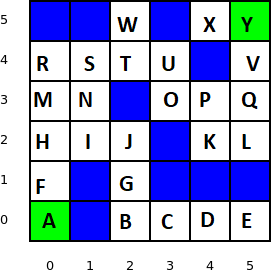

In [ ]:
import math

# Node class to represent each tile/node in the maze
class Node:
    def __init__(self, state, parent, actions, totalCost, heuristic):
        self.state = state            # Node name (like 'A', 'B', 'C'...)
        self.parent = parent          # Parent node in the current path
        self.actions = actions        # List of tuples: (neighbor node, cost to neighbor)
        self.totalCost = totalCost    # g(n): Cost from start node to this node
        self.heuristic = heuristic    # h(n): Estimated cost from this node to the goal

# Heuristic function: calculates Euclidean distance from any node to the goal node 'Y' at (5, 5)
def heuristic(node):
    node_coords = {
        'A': (0, 0), 'B': (1, 0), 'C': (2, 0), 'D': (3, 0), 'E': (4, 0), 'F': (0, 1),
        'G': (1, 1), 'H': (0, 2), 'I': (1, 2), 'J': (2, 2), 'K': (3, 2), 'L': (4, 2),
        'M': (0, 3), 'N': (1, 3), 'O': (3, 3), 'P': (4, 3), 'Q': (5, 3),
        'R': (0, 4), 'S': (1, 4), 'T': (2, 4), 'U': (3, 4), 'V': (5, 4),
        'W': (1, 5), 'X': (3, 5), 'Y': (5, 5)
    }
    # Get coordinates of the current node; if missing, default to (0, 0)
    x1, y1 = node_coords.get(node, (0, 0))
    # Coordinates of goal node 'Y'
    x2, y2 = (5, 5)
    # Return Euclidean distance
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Finds and returns the node from the frontier with the smallest total estimated cost (f(n) = g + h)
def findMin(frontier):
    minCost = float('inf')  # Start with a very high minimum cost
    minNode = None
    for node, cost in frontier.items():
        if cost < minCost:
            minCost = cost
            minNode = node
    return minNode

# Reconstructs the path from goal to start using parent pointers
def actionsequence(graph, initialState, goalState):
    path = [goalState]                       # Start from goal node
    parent = graph[goalState].parent         # Get its parent
    while parent is not None:
        path.append(parent)                  # Add parent to path
        parent = graph[parent].parent        # Move to the next parent
    path.reverse()                           # Reverse to get path from start to goal
    return path

# Main A* Search Function
def Astar():
    initialState = 'A'     # Start node
    goalState = 'Y'        # Goal node

    # Maze graph: each node is connected to others unless blocked by a wall
    # Each node has: state, parent, list of actions (neighbors with cost), position, and heuristic (initially 0)
    graph = {
        'A': Node('A', None, [('F', 1)], (0, 0), 0),
        'B': Node('B', None, [('G', 1), ('C', 1)], (1, 0), 0),
        'C': Node('C', None, [('B', 1), ('D', 1)], (2, 0), 0),
        'D': Node('D', None, [('C', 1), ('E', 1)], (3, 0), 0),
        'E': Node('E', None, [('D', 1)], (4, 0), 0),
        'F': Node('F', None, [('A', 1), ('H', 1)], (0, 1), 0),
        'G': Node('G', None, [('B', 1), ('J', 1)], (1, 1), 0),
        'H': Node('H', None, [('F', 1), ('I', 1), ('M', 1)], (0, 2), 0),
        'I': Node('I', None, [('H', 1), ('J', 1), ('N', 1)], (1, 2), 0),
        'J': Node('J', None, [('G', 1), ('I', 1)], (2, 2), 0),
        'K': Node('K', None, [('L', 1)], (3, 2), 0),
        'L': Node('L', None, [('K', 1), ('Q', 1)], (4, 2), 0),
        'M': Node('M', None, [('H', 1), ('N', 1), ('R', 1)], (0, 3), 0),
        'N': Node('N', None, [('I', 1), ('M', 1), ('S', 1)], (1, 3), 0),
        'O': Node('O', None, [('P', 1)], (3, 3), 0),
        'P': Node('P', None, [('O', 1), ('Q', 1)], (4, 3), 0),
        'Q': Node('Q', None, [('L', 1), ('P', 1), ('V', 1)], (5, 3), 0),
        'R': Node('R', None, [('M', 1), ('S', 1)], (0, 4), 0),
        'S': Node('S', None, [('N', 1), ('R', 1), ('T', 1)], (1, 4), 0),
        'T': Node('T', None, [('S', 1), ('U', 1), ('W', 1)], (2, 4), 0),
        'U': Node('U', None, [('O', 1), ('T', 1)], (3, 4), 0),
        'V': Node('V', None, [('Q', 1), ('Y', 1)], (5, 4), 0),
        'W': Node('W', None, [('T', 1)], (1, 5), 0),
        'X': Node('X', None, [('Y', 1)], (3, 5), 0),
        'Y': Node('Y', None, [('V', 1), ('X', 1)], (5, 5), 0)
    }

    # Set the cost from start to itself as 0 (g(A) = 0)
    graph[initialState].totalCost = 0

    # Frontier contains nodes to explore, initially the start node
    # Key = node, Value = f(n) = g(n) + h(n)
    frontier = {initialState: heuristic(initialState)}

    # Explored set keeps track of visited nodes
    explored = set()

    # Main A* loop
    while frontier:
        # Get node with the lowest estimated cost f(n)
        current = findMin(frontier)
        del frontier[current]
        explored.add(current)

        # If goal is found, reconstruct and return the path
        if current == goalState:
            return actionsequence(graph, initialState, goalState)

        currentCost = graph[current].totalCost  # g(current)

        # Explore all neighbors of the current node
        for child, cost in graph[current].actions:
            newCost = currentCost + cost  # g(child) = g(current) + cost to child

            # Check if this path to child is better than any previous one
            if child not in explored and (child not in frontier or newCost < graph[child].totalCost):
                graph[child].parent = current           # Update parent to reconstruct path later
                graph[child].totalCost = newCost        # Update g(n)
                frontier[child] = newCost + heuristic(child)  # Update f(n) = g + h

    return None  # No path found if frontier gets empty

# Run the A* algorithm and print the path from 'A' to 'Y'
solution = Astar()
print("Path to goal:", solution)